# DEMO SHIFT FOR MIDTERM

In [338]:
# import libraries
import pandas as pd
import numpy as np
import libpysal as lp
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import contextily as ctx
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [339]:
# import demographic csv file data from 2017 Census, rename FIPS column for append, 
## and ensure FIPS syntax is correct
tracts_race_17 = pd.read_csv('data/race_2017.csv', dtype = {'fips':str})
tracts_race_17.rename(columns={'fips': 'FIPS'}, inplace=True)
# fips column does not have a leading zero, let's add that here
tracts_race_17['FIPS'] = tracts_race_17['FIPS'].str.zfill(11)
# import demographic csv file data from 2021 Census, rename some columns for append,
## and ensure FIPS syntax is correct
tracts_race_21 = pd.read_csv('data/rent_burden_ct_1.csv',dtype = {'Geo_FIPS':str})
tracts_race_21.rename(columns={'total_pop': 'total','white_alone':'white','black_alone':
                               'black','asian_alone':'asian' }, inplace=True)
# fips column does not have a leading zero, let's add that here
tracts_race_21['FIPS'] = tracts_race_21['Geo_FIPS'].str.zfill(11)
# import LA neighborhoods from ArcGIS
nbh = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [340]:
# have a look at demographic data and truncate the columns to relevant races
tracts_race_17.head()

,FIPS,total,white,black,american_indian,asian,hawaiian,other,two_or_more,white_not_hispanic,hispanic
0,06037101110,816,587,26,0,19,0,155,29,483,282
1,06037101122,230,211,0,0,19,0,0,0,177,34
2,06037101210,1975,1551,69,0,61,0,272,22,987,836
3,06037101220,808,532,11,0,112,0,90,63,428,177
4,06037101300,171,112,0,0,25,0,26,8,112,34


In [341]:
tracts_race_17 = tracts_race_17[['FIPS','total','white','black','asian','hispanic']]
tracts_race_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FIPS      2346 non-null   object
 1   total     2346 non-null   int64 
 2   white     2346 non-null   int64 
 3   black     2346 non-null   int64 
 4   asian     2346 non-null   int64 
 5   hispanic  2346 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 110.1+ KB


In [342]:
tracts_race_17.describe()

,total,white,black,asian,hispanic
count,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000
mean,759.946292,391.991475,90.564791,97.823956,322.075021
std,540.569609,375.060942,158.609728,147.734555,260.780234
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,352.500000,146.000000,0.000000,7.000000,102.000000
50%,674.500000,279.000000,33.000000,43.000000,268.000000
75%,1030.750000,518.500000,108.750000,123.750000,494.750000
max,5200.000000,3971.000000,1926.000000,1389.000000,1240.000000


In [343]:
tracts_race_21.head()

,Geo_FIPS,total_housing_units,white,black,american_indian_alone,asian,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total,rent_burden,FIPS
0,6037101110,644,438,0,0,58,0,52,96,372,207,3879,0.549689,06037101110
1,6037101122,344,287,0,0,0,0,33,24,287,33,4247,0.706395,06037101122
2,6037101220,762,450,8,16,48,0,110,130,394,285,3583,0.535433,06037101220
3,6037101221,1140,815,68,0,25,0,178,54,747,269,3723,0.663158,06037101221
4,6037101222,816,715,17,0,28,17,28,11,515,239,2690,0.651961,06037101222


In [344]:
tracts_race_21 = tracts_race_21[['FIPS','total','white','black','asian','hispanic']]
tracts_race_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FIPS      2498 non-null   object
 1   total     2498 non-null   int64 
 2   white     2498 non-null   int64 
 3   black     2498 non-null   int64 
 4   asian     2498 non-null   int64 
 5   hispanic  2498 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 117.2+ KB


In [345]:
tracts_race_21.describe()

,total,white,black,asian,hispanic
count,2498.00000,2498.000000,2498.000000,2498.000000,2498.000000
mean,4011.06285,325.362690,83.418335,91.768615,309.367894
std,1470.99188,323.090646,139.218466,139.523622,252.803726
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2993.25000,117.000000,0.000000,6.000000,104.000000
50%,3933.00000,225.500000,33.000000,41.000000,250.500000
75%,4954.00000,426.000000,104.000000,120.000000,474.750000
max,13830.00000,3474.000000,1218.000000,1442.000000,1326.000000


In [346]:
# 2021 data has more census tracts
print(2498-2346)

152


In [347]:
# figure out what to do about 152 census tract discrepancy 
# merge &  drop the rows that don't match and then append
race_merge = tracts_race_17.merge(tracts_race_21, on='FIPS',
                                  suffixes=('_2017', '_2021'),
                                 indicator=True)
race_merge = race_merge[race_merge['_merge'] == 'both']
race_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FIPS           2022 non-null   object  
 1   total_2017     2022 non-null   int64   
 2   white_2017     2022 non-null   int64   
 3   black_2017     2022 non-null   int64   
 4   asian_2017     2022 non-null   int64   
 5   hispanic_2017  2022 non-null   int64   
 6   total_2021     2022 non-null   int64   
 7   white_2021     2022 non-null   int64   
 8   black_2021     2022 non-null   int64   
 9   asian_2021     2022 non-null   int64   
 10  hispanic_2021  2022 non-null   int64   
 11  _merge         2022 non-null   category
dtypes: category(1), int64(10), object(1)
memory usage: 191.7+ KB


In [348]:
# now disaggregatge to make the dataset long instead of wide to prepare for appending
ct_21 = race_merge[['FIPS','total_2021','white_2021','black_2021', 'asian_2021', 'hispanic_2021']]
ct_21.rename(columns={'total_2021': 'total','white_2021':'white','black_2021':
                               'black','asian_2021':'asian','hispanic_2021':'hispanic' }, inplace=True)
ct_17 = race_merge.drop(columns=['_merge','total_2021','white_2021','black_2021', 'asian_2021', 'hispanic_2021'])
ct_17.rename(columns={'total_2017': 'total','white_2017':'white','black_2017':
                               'black','asian_2017':'asian','hispanic_2017':'hispanic' }, inplace=True)

In [349]:
# add column for year for each demographic dataset
ct_17['year']=2017
ct_21['year']=2021
# demogaphic information is ready to be appended
ct_race=ct_17.append(ct_21)
# 10 year census tract data for understanding of demograhic shifts
ct_race.sort_values(by=['year','FIPS'])
ct_race

,FIPS,total,white,black,asian,hispanic,year
0,06037101110,816,587,26,19,282,2017
1,06037101122,230,211,0,19,34,2017
2,06037101220,808,532,11,112,177,2017
3,06037101300,171,112,0,25,34,2017
4,06037101400,460,364,0,35,216,2017
...,...,...,...,...,...,...,...
2017,06037980031,1160,10,0,0,10,2021
2018,06037980033,13,0,0,0,0,2021
2019,06037990100,0,0,0,0,0,2021
2020,06037990200,0,0,0,0,0,2021


In [350]:
# merge in census shapefile
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts = tracts[['CT20','geometry']]
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()
spatial_race=tracts.merge(ct_race, on='FIPS')
spatial_race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4038 entries, 0 to 4037
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CT20      4038 non-null   object  
 1   geometry  4038 non-null   geometry
 2   FIPS      4038 non-null   object  
 3   total     4038 non-null   int64   
 4   white     4038 non-null   int64   
 5   black     4038 non-null   int64   
 6   asian     4038 non-null   int64   
 7   hispanic  4038 non-null   int64   
 8   year      4038 non-null   int64   
dtypes: geometry(1), int64(6), object(2)
memory usage: 315.5+ KB


In [351]:
# explore neighborhoods
nbh.head()

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


In [352]:
nbh.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [353]:
# prepare demographic data for spatial join with neighborhoods
# first adjust census data to point data 
spatial_race = spatial_race.to_crs(4326)
spatial_race['Centroid']=spatial_race.to_crs('+proj=cea').centroid.to_crs(spatial_race.crs)
spatial_race_1 = spatial_race.to_crs(4326)
spatial_race_1 = spatial_race_1.drop(columns=['CT20','geometry'])
spatial_race_1.rename(columns={'Centroid': 'geometry'}, inplace=True)
spatial_race_1.head(20)

,FIPS,total,white,black,asian,hispanic,year,geometry
0,06037101110,816,587,26,19,282,2017,POINT (-118.29300 34.25948)
1,06037101110,3879,438,0,58,207,2021,POINT (-118.29300 34.25948)
2,06037101122,230,211,0,19,34,2017,POINT (-118.29016 34.26773)
3,06037101122,4247,287,0,0,33,2021,POINT (-118.29016 34.26773)
4,06037101220,808,532,11,112,177,2017,POINT (-118.28164 34.25161)
5,06037101220,3583,450,8,48,285,2021,POINT (-118.28164 34.25161)
6,06037101300,171,112,0,25,34,2017,POINT (-118.27101 34.24878)
7,06037101300,4068,170,0,0,52,2021,POINT (-118.27101 34.24878)
8,06037101400,460,364,0,35,216,2017,POINT (-118.29417 34.24286)
9,06037101400,3372,353,0,34,68,2021,POINT (-118.29417 34.24286)


In [354]:
# spatial join

nbh_race = nbh.sjoin(spatial_race_1, how="left")
nbh_race.sort_values(by=['FIPS','year'])
nbh_race.head()


,OBJECTID,name,geometry,index_right,FIPS,total,white,black,asian,hispanic,year
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",1225,06037221601,3008,222,152,26,585,2021
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",1222,06037221500,1031,161,453,34,513,2017
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",1223,06037221500,3542,215,283,68,416,2021
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",1241,06037222100,4264,216,196,32,495,2021
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",1240,06037222100,782,111,281,79,379,2017


In [355]:
# collapse by year and neighborhood
nbhr = nbh_race.groupby(['year','name'],
                                           as_index=False).agg(Geometry = ('geometry','first'),
                                                               Total = ('total','sum'),
                                                               White = ('white','sum'),
                                                               Black = ('black','sum'),
                                                               Asian = ('asian','sum'),
                                                               Hispanic = ('hispanic','sum')
                                                              )
nbhr = nbhr.sort_values(by=['name','year'])
nbhr.head(20)

,year,name,Geometry,Total,White,Black,Asian,Hispanic
0,2017,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",4187,713,1332,402,2151
114,2021,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",17616,1132,930,472,2460
1,2017,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",848,487,11,72,696
115,2021,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",18944,368,0,38,626
2,2017,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",5181,1217,983,994,2858
116,2021,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",17696,1232,1203,831,2596
3,2017,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",2565,1466,18,438,855
117,2021,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",10563,1466,8,565,862
4,2017,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",4428,710,3194,153,796
118,2021,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",15429,530,2908,192,1070


In [356]:
# row calculations for bar chart of seemingly most gentrified areas 
nbhr['delta'] = nbhr['Black'].div(nbhr.groupby('name')['Black'].shift())
nbhr['delta_100_black'] = nbhr['delta']*100
nbhr['delta_w'] = nbhr['White'].div(nbhr.groupby('name')['White'].shift())
nbhr['delta_100_white'] = nbhr['delta_w']*100
nbhr

,year,name,Geometry,Total,White,Black,Asian,Hispanic,delta,delta_100_black,delta_w,delta_100_white
0,2017,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",4187,713,1332,402,2151,NaN,NaN,NaN,NaN
114,2021,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",17616,1132,930,472,2460,0.698198,69.819820,1.587658,158.765778
1,2017,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",848,487,11,72,696,NaN,NaN,NaN,NaN
115,2021,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",18944,368,0,38,626,0.000000,0.000000,0.755647,75.564682
2,2017,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",5181,1217,983,994,2858,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
225,2021,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0...",6632,546,134,833,334,0.644231,64.423077,1.056093,105.609284
112,2017,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2...",5304,2033,369,732,2800,NaN,NaN,NaN,NaN
226,2021,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2...",33384,1741,300,630,3170,0.813008,81.300813,0.856370,85.636990
113,2017,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",7849,5761,504,797,968,NaN,NaN,NaN,NaN


In [357]:
# look at the segment of highly populated black communites that lost population, while whites gained 
nbhr_1 = nbhr[nbhr['delta'].notna()]
nbhr_1

,year,name,Geometry,Total,White,Black,Asian,Hispanic,delta,delta_100_black,delta_w,delta_100_white
114,2021,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",17616,1132,930,472,2460,0.698198,69.819820,1.587658,158.765778
115,2021,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",18944,368,0,38,626,0.000000,0.000000,0.755647,75.564682
116,2021,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",17696,1232,1203,831,2596,1.223805,122.380468,1.012325,101.232539
117,2021,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",10563,1466,8,565,862,0.444444,44.444444,1.000000,100.000000
118,2021,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",15429,530,2908,192,1070,0.910457,91.045711,0.746479,74.647887
...,...,...,...,...,...,...,...,...,...,...,...,...
223,2021,Westwood,"POLYGON ((-118.42946 34.07925, -118.42938 34.0...",34002,2751,158,1024,567,0.969325,96.932515,0.880602,88.060179
224,2021,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880...",56190,5702,530,314,8267,1.373057,137.305699,1.264582,126.458195
225,2021,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0...",6632,546,134,833,334,0.644231,64.423077,1.056093,105.609284
226,2021,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2...",33384,1741,300,630,3170,0.813008,81.300813,0.856370,85.636990


In [358]:
# select for the black communities that are populous and where black folks have moved or been moved out in the past decade
nbhr_1 = nbhr.sort_values(by=['name'])
nbhr_1 = nbhr[(nbhr['Black']>1000) & (nbhr['delta_100_black']<100)]
nbhr_1 = nbhr_1.sort_values(by=['delta_100_black'])
nbhr_1.head(20)

,year,name,Geometry,Total,White,Black,Asian,Hispanic,delta,delta_100_black,delta_w,delta_100_white
125,2021,Broadway-Manchester,"POLYGON ((-118.26954 33.92919, -118.26956 33.9...",25322,975,1555,41,2541,0.730047,73.004695,1.090604,109.060403
132,2021,Chesterfield Square,"POLYGON ((-118.30898 33.97458, -118.30898 33.9...",15197,127,1260,15,865,0.744241,74.424099,0.327320,32.731959
218,2021,West Adams,"POLYGON ((-118.36955 34.03517, -118.36860 34.0...",19945,1677,1459,172,2305,0.767087,76.708728,0.927032,92.703151
165,2021,Jefferson Park,"POLYGON ((-118.31335 34.03721, -118.30900 34.0...",26295,1416,2517,333,2680,0.856122,85.612245,1.573333,157.333333
175,2021,Mid-City,"MULTIPOLYGON (((-118.36860 34.03497, -118.3685...",44239,4093,3158,633,4510,0.865680,86.567982,0.907740,90.774008
214,2021,Vermont Square,"POLYGON ((-118.28112 34.01109, -118.28121 34.0...",32037,1769,1624,124,3820,0.874529,87.452881,1.227620,122.761971
194,2021,San Pedro,"MULTIPOLYGON (((-118.28845 33.75438, -118.2885...",67972,8103,1458,1116,7909,0.875676,87.567568,1.049340,104.933955
145,2021,Exposition Park,"POLYGON ((-118.29155 34.01837, -118.28294 34.0...",29537,1419,1753,446,3293,0.880020,88.002008,1.376334,137.633366
147,2021,Florence,"POLYGON ((-118.25645 33.98246, -118.25641 33.9...",55192,1847,2347,48,6643,0.884992,88.499246,0.886276,88.627639
151,2021,Green Meadows,"POLYGON ((-118.25411 33.95104, -118.25411 33.9...",34761,1277,1794,0,3149,0.887679,88.767937,1.108507,110.850694


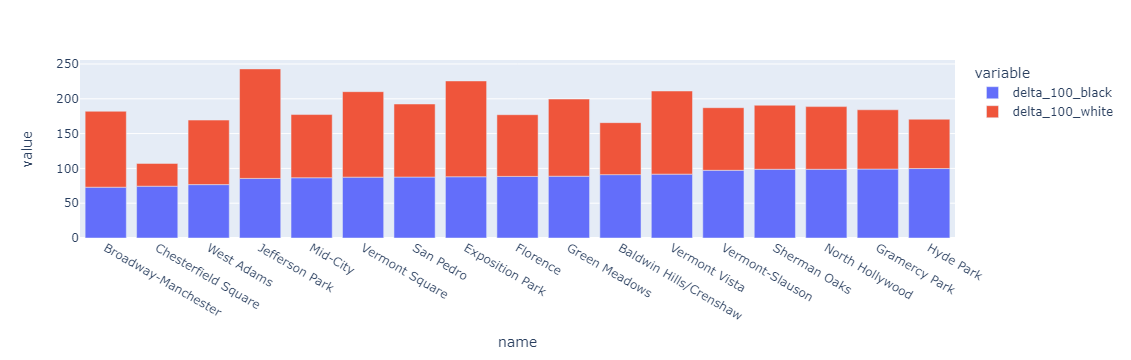

In [359]:
# test graphs I
fig = px.bar(nbhr_1.head(20),
       x='name',
       y=['delta_100_black','delta_100_white'],
)

fig.show()

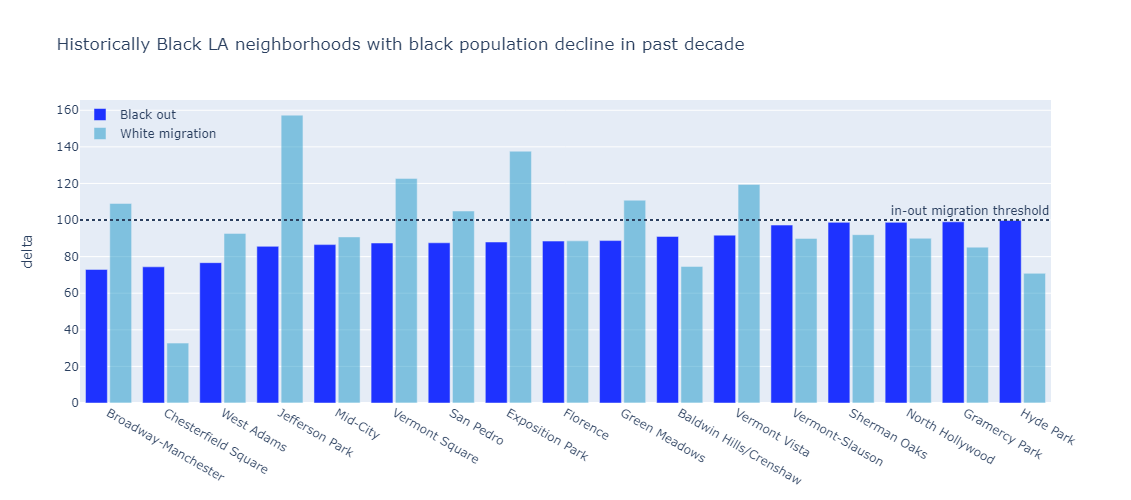

In [403]:
# test graphs II
fig = go.Figure()
fig.add_trace(go.Bar(x=nbhr_1['name'],
                y=nbhr_1['delta_100_black'],
                name='Black out',
                marker_color='rgb(30, 50, 350)'
                ))
fig.add_trace(go.Bar(x=nbhr_1['name'],
                     y=nbhr_1['delta_100_white'],
                     opacity = .5,
                     name='White migration',
                marker_color='rgb(26, 150, 200)'
                ))
fig.add_hline(y=100, line_dash="dot",
              annotation_text="in-out migration threshold", 
              annotation_position="top right")

fig.update_layout(
    title='Historically Black LA neighborhoods with black population decline in past decade',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='delta',
        titlefont_size=14,
        tickfont_size=12,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 ,# gap between bars of the same location coordinate.
    
    width=1000,
    height=500
)
fig.show()